In [3]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\71591\\Desktop\\dataset\\online_gaming_behavior_dataset.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0                    25          Medium  
1                    10          Medium  
2                    41            High  
3                    47          Medium  
4                    37          Medium

In [4]:
# Display basic information about the dataset
data.info()
# Display descriptive statistics for the dataset
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  40034.000000  40034.000000   40034.000000     40034.000000   
mean   29016.500000     31.992531      12.024365         0.200854   
std    11556.964675     10.043227       6.914638         0.400644   
min     9000.000000     15.000000       0.000115         0.000000   
25%    19008.250000     23.000000       6.067501         0.000000   
50%    29016.500000     32.000000      12.008002         0.000000   
75%    39024.750000     41.000000      17.963831         0.000000   
max    49033.000000     49.000000      23.999592         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     40034.000000               40034.000000  40034.000000   
mean          9.471774                  94.792252     49.655568   
std           5.763667                  49.011375     28.588379   
min           0.000000                  10.000000      1.000000   
25%           4.000000                  52.000000     25.000000   
50%           9.000000                  95.000000     49.000000   
75%          14.000000                 137.000000     74.000000   
max          19.000000                 179.000000     99.000000   

       AchievementsUnlocked  
count          40034.000000  
mean              24.526477  
std               14.430726  
min                0.000000  
25%               12.000000  
50%               25.000000  
75%               37.000000  
max               49.000000

In [5]:
# Check for missing values
data.isnull().sum()


PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical features
label_encoders = {}
for column in ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
X = data.drop(columns=['PlayerID', 'EngagementLevel'])
y = data['EngagementLevel']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

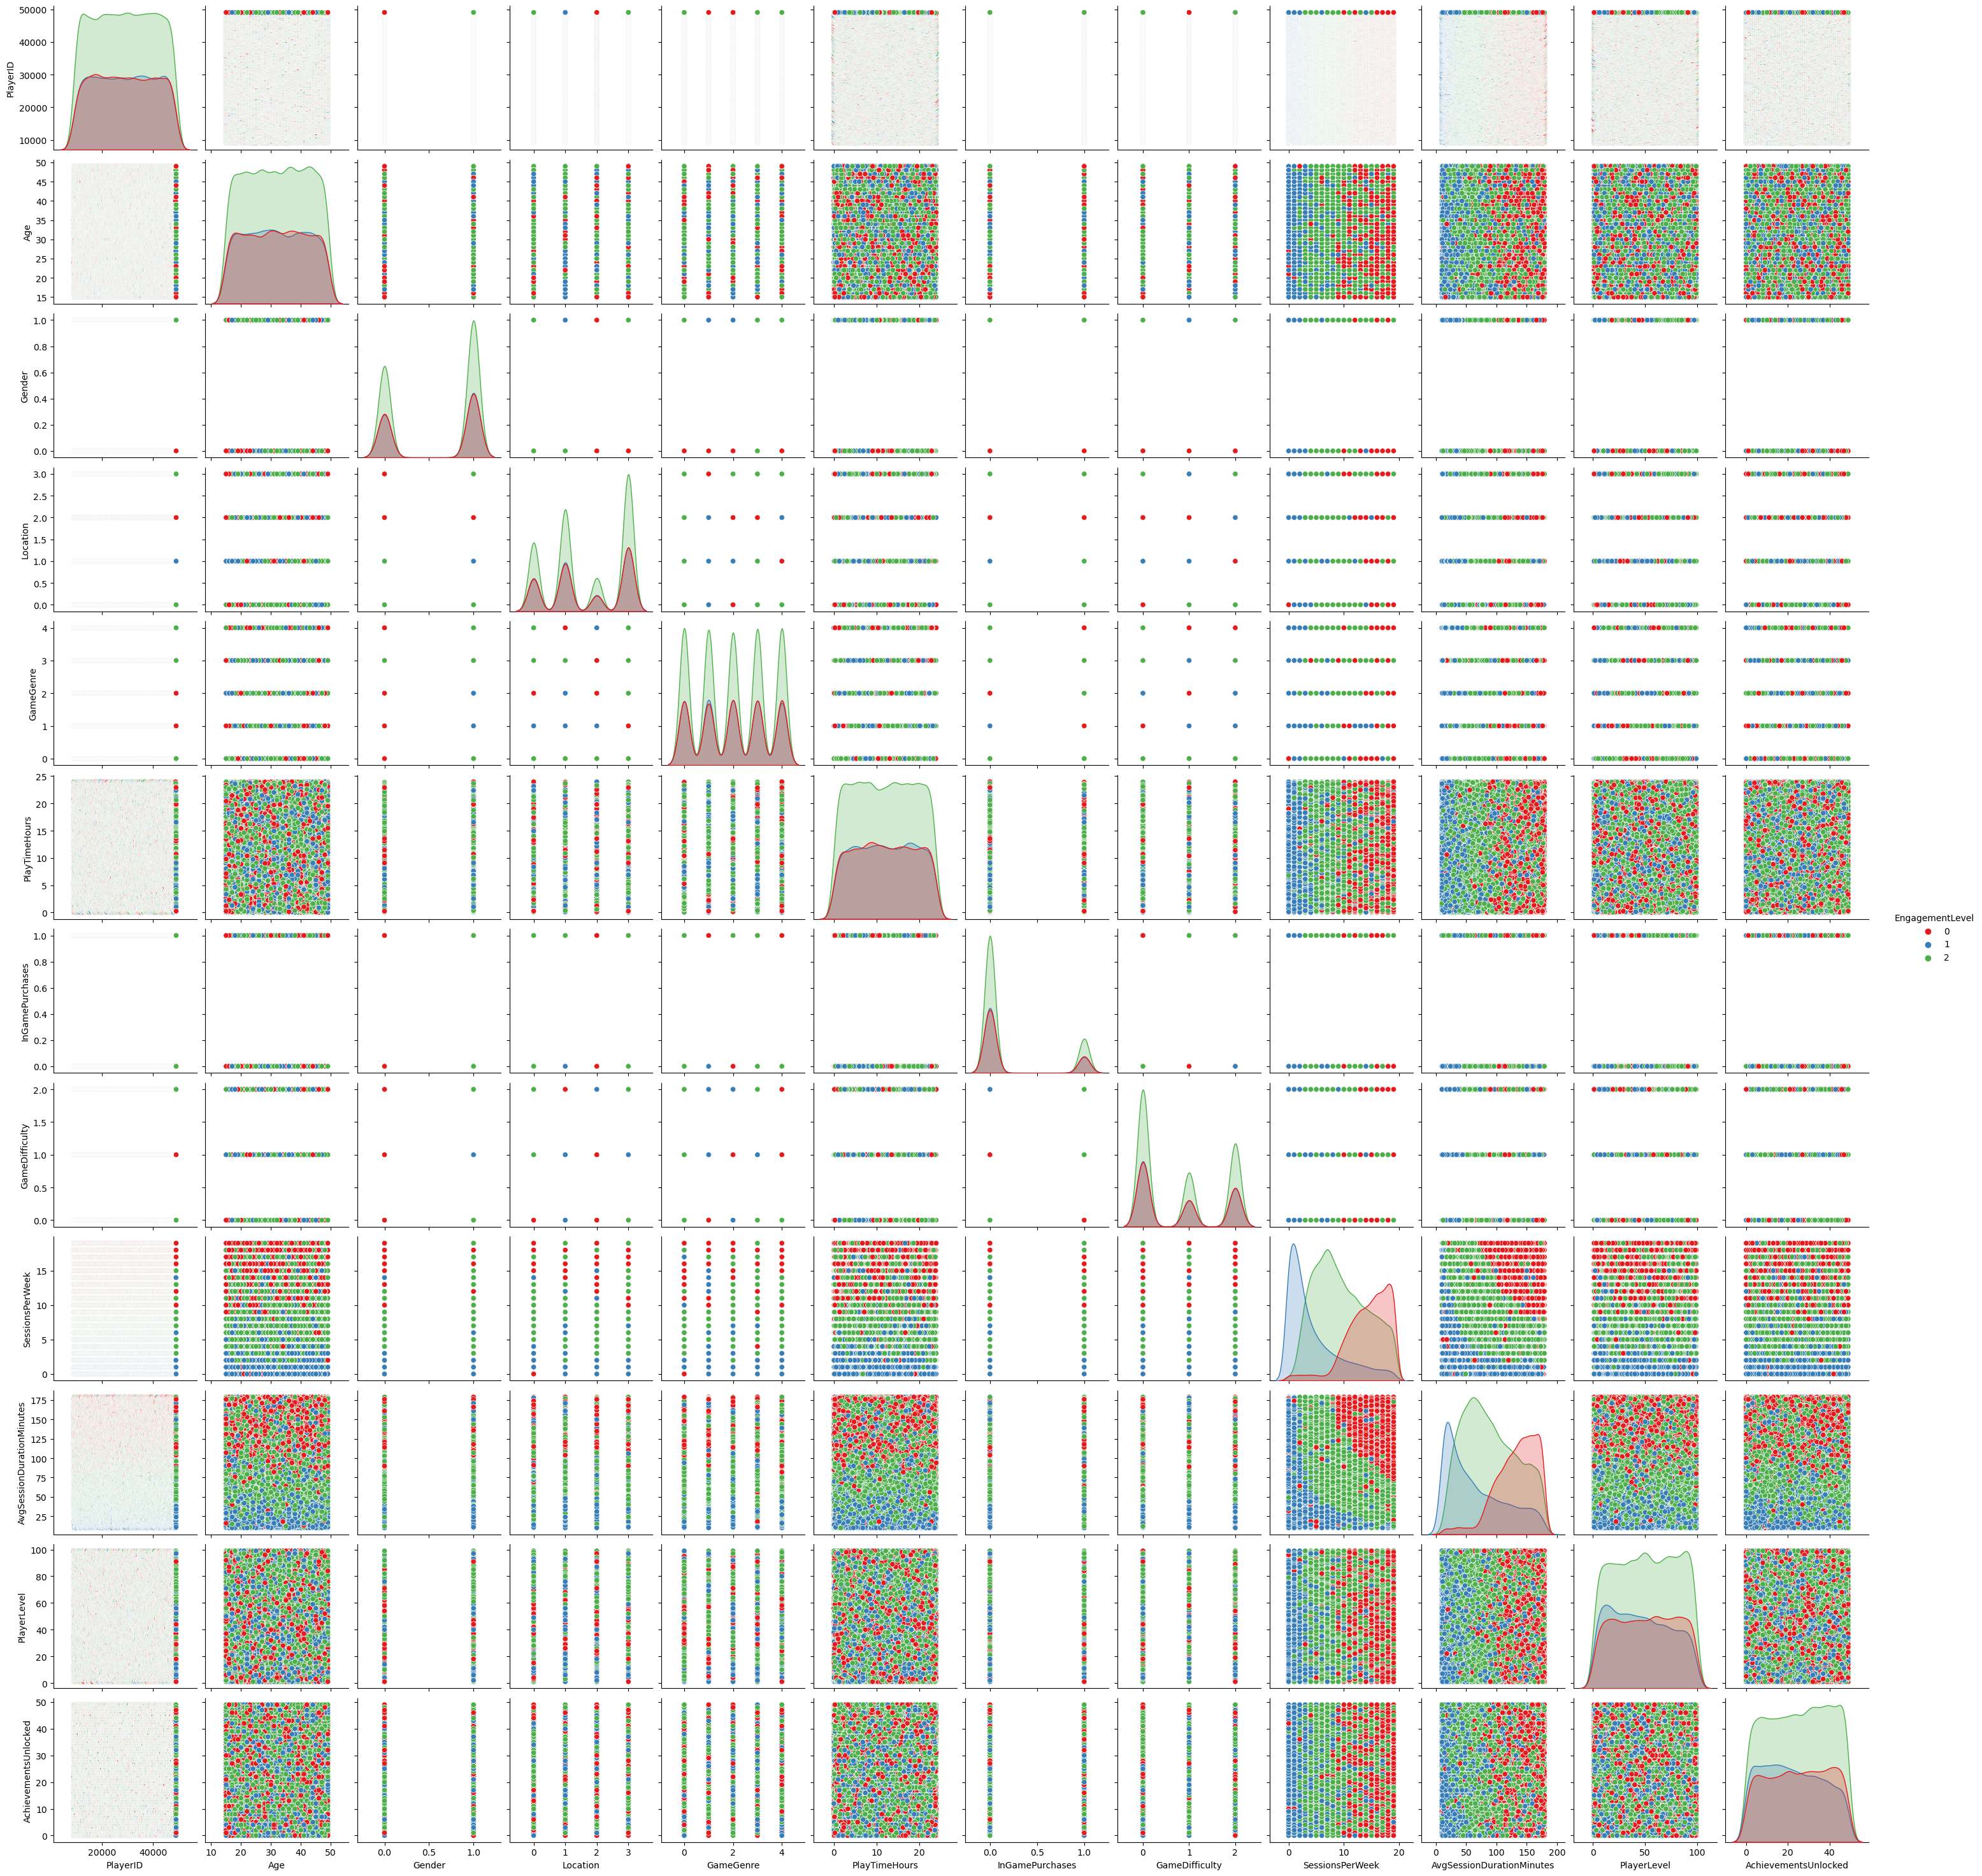

In [19]:
import seaborn as sns
# Pair plot
sns.pairplot(data, hue='EngagementLevel', diag_kind='kde', palette='Set1')
plt.show()

KNN Accuracy: 0.7551
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      3132
           1       0.74      0.63      0.68      3069
           2       0.74      0.82      0.78      5810

    accuracy                           0.76     12011
   macro avg       0.76      0.74      0.75     12011
weighted avg       0.76      0.76      0.75     12011



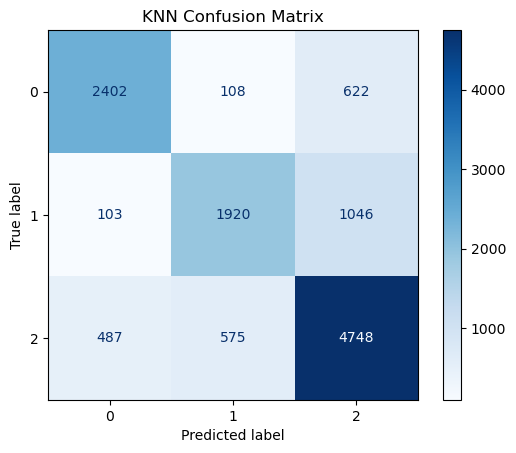

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display results
print(f"KNN Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()


Logistic Regression Accuracy: 0.8204
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      3132
           1       0.79      0.70      0.74      3069
           2       0.80      0.88      0.84      5810

    accuracy                           0.82     12011
   macro avg       0.83      0.80      0.81     12011
weighted avg       0.82      0.82      0.82     12011



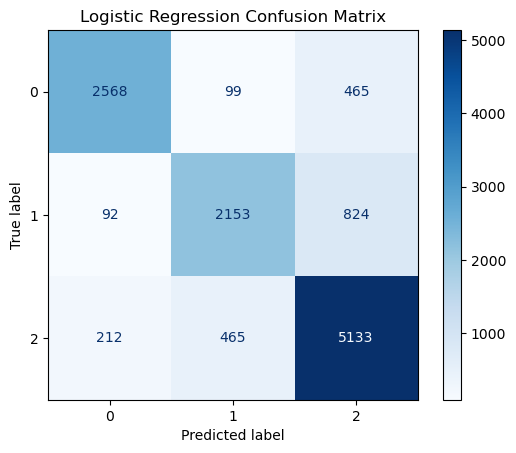

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display results
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


SVM Accuracy: 0.8215
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      3132
           1       0.79      0.71      0.75      3069
           2       0.81      0.87      0.84      5810

    accuracy                           0.82     12011
   macro avg       0.83      0.81      0.81     12011
weighted avg       0.82      0.82      0.82     12011



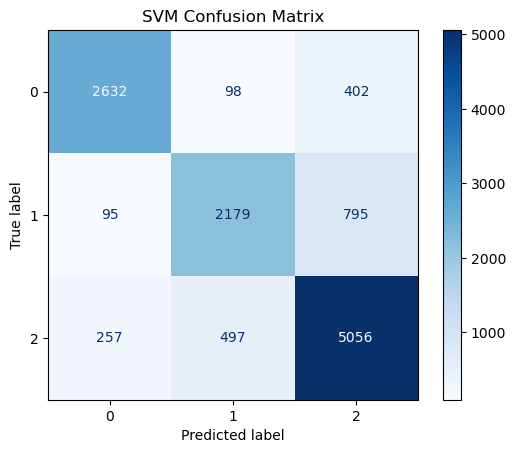

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train SVM
svm = SVC(kernel='linear')  # or use 'rbf' for a non-linear kernel
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display results
print(f"SVM Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()


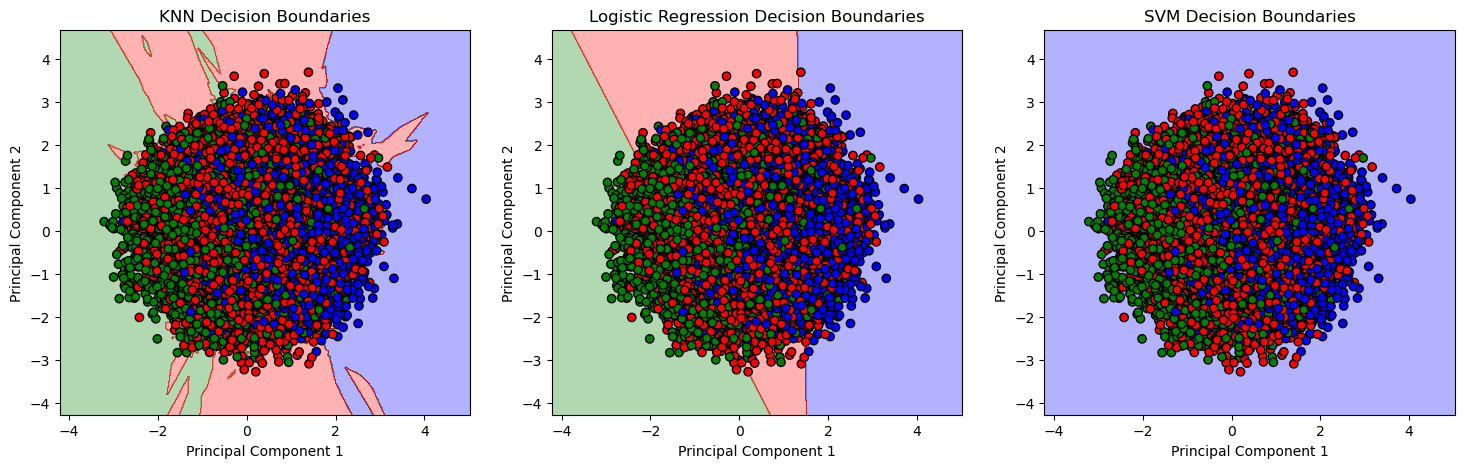

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Reducing to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Define a function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['blue', 'green', 'red']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['blue', 'green', 'red']))
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

# Fit and plot for KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y_train)
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plot_decision_boundaries(X_pca, y_train, knn, 'KNN Decision Boundaries')

# Fit and plot for Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_pca, y_train)
plt.subplot(1, 3, 2)
plot_decision_boundaries(X_pca, y_train, log_reg, 'Logistic Regression Decision Boundaries')

# Fit and plot for SVM
svm = SVC(kernel='linear')
svm.fit(X_pca, y_train)
plt.subplot(1, 3, 3)
plot_decision_boundaries(X_pca, y_train, svm, 'SVM Decision Boundaries')

plt.show()


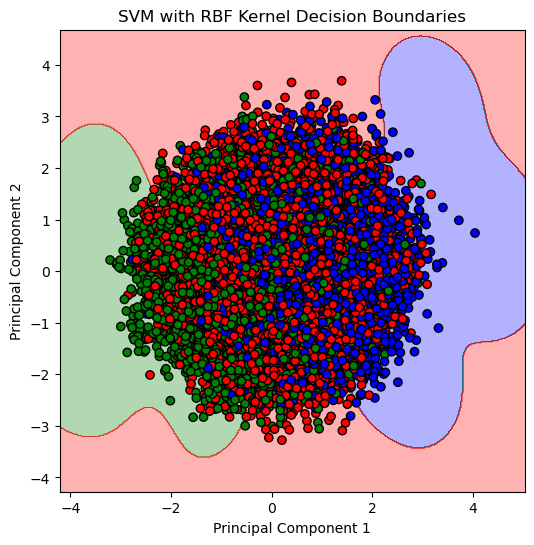

In [17]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from matplotlib.colors import ListedColormap

# Reducing to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Define a function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['blue', 'green', 'red']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['blue', 'green', 'red']))
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

# Initialize and train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale')
svm_rbf.fit(X_pca, y_train)

# Plotting decision boundaries
plt.figure(figsize=(6, 6))
plot_decision_boundaries(X_pca, y_train, svm_rbf, 'SVM with RBF Kernel Decision Boundaries')
plt.show()
